In [1]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
%matplotlib inline

In [2]:
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

In [3]:
raft_data_5_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\raft_outdoor\\raft_5-nodes\\data.csv", sep=",")

In [4]:
raft_data_5_nodes[raft_data_5_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,19,188,56,18
3,1,2,19,107,56,18
4,1,3,19,179,56,18
...,...,...,...,...,...,...
4939,4,999,20,96,35,23
4940,5,986,19,597,36,23
4941,2,1000,20,423,36,22
4942,3,1000,19,89,42,22


In [5]:
paxos_data_5_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\paxos_outdoor\\paxos_5-nodes\\data.csv", sep=",")

In [6]:
noalg_data_5_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\control_outdoor\\outdoor_control_5-nodes\\data.csv", error_bad_lines=False, sep=",")

b'Skipping line 1109: expected 6 fields, saw 7\nSkipping line 1384: expected 6 fields, saw 7\nSkipping line 1396: expected 6 fields, saw 7\nSkipping line 1469: expected 6 fields, saw 7\n'


In [7]:
raft_data_5_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nodeName      4944 non-null   object
 1   packetNumber  4940 non-null   object
 2   temperature   4940 non-null   object
 3   brightness    4940 non-null   object
 4   humidity      4936 non-null   object
 5   onBoardTemp   4929 non-null   object
dtypes: object(6)
memory usage: 231.9+ KB


In [8]:
raft_data_5_nodes.shape

(4944, 6)

In [9]:
paxos_data_5_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4785 entries, 0 to 4784
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nodeName      4785 non-null   object
 1   packetNumber  4763 non-null   object
 2   temperature   4763 non-null   object
 3   brightness    4762 non-null   object
 4   humidity      4762 non-null   object
 5   onBoardTemp   4757 non-null   object
dtypes: object(6)
memory usage: 224.4+ KB


In [10]:
paxos_data_5_nodes.shape

(4785, 6)

In [11]:
noalg_data_5_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nodeName      3007 non-null   object
 1   packetNumber  2969 non-null   object
 2   temperature   2926 non-null   object
 3   brightness    2894 non-null   object
 4   humidity      2856 non-null   object
 5   onBoardTemp   2833 non-null   object
dtypes: object(6)
memory usage: 141.1+ KB


In [12]:
noalg_data_5_nodes.shape

(3007, 6)

In [13]:
#RAFT

In [14]:
raft_data_5_nodes[raft_data_5_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,19,188,56,18
3,1,2,19,107,56,18
4,1,3,19,179,56,18
...,...,...,...,...,...,...
4939,4,999,20,96,35,23
4940,5,986,19,597,36,23
4941,2,1000,20,423,36,22
4942,3,1000,19,89,42,22


In [15]:
raft_data_5_nodes_clean = raft_data_5_nodes.dropna()

In [16]:
raft_data_5_nodes_clean.shape

(4929, 6)

In [17]:
raft_data_5_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\raft_data_5_nodes_clean.csv', index = False, header=True)

In [18]:
#manual cleaning of the csv req

In [19]:
clean_raft_data_5_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\raft_data_5_nodes_clean.csv", sep=",")

In [20]:
clean_raft_data_5 = clean_raft_data_5_nodes.dropna()

In [21]:
final_clean_raft_5 = clean_raft_data_5.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [22]:
final_clean_raft_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4917 entries, 0 to 4928
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   nodeName      4917 non-null   int64
 1   packetNumber  4917 non-null   int64
 2   temperature   4917 non-null   int64
 3   brightness    4917 non-null   int64
 4   humidity      4917 non-null   int64
 5   onBoardTemp   4917 non-null   int64
dtypes: int64(6)
memory usage: 268.9 KB


In [23]:
#PAXOS

In [24]:
paxos_data_5_nodes[paxos_data_5_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,21,27,48,22
3,1,2,21,27,48,22
4,1,3,21,27,48,22
...,...,...,...,...,...,...
4780,5,991,22,0,48,23
4781,1,998,22,0,47,23
4782,2,1000,23,65535,46,23
4783,3,1000,21,65535,55,22


In [25]:
paxos_data_5_nodes_clean = paxos_data_5_nodes.dropna()

In [26]:
paxos_data_5_nodes_clean.shape

(4757, 6)

In [27]:
paxos_data_5_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\paxos_data_5_nodes_clean.csv', index = False, header=True)

In [34]:
#manual cleaning of the csv req

In [39]:
clean_paxos_data_5_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\paxos_data_5_nodes_clean.csv", sep=",")

In [40]:
clean_paxos_data_5_nodes.shape

(4757, 6)

In [41]:
clean_paxos_data_5 = clean_paxos_data_5_nodes.dropna()

In [42]:
clean_paxos_data_5.shape

(4746, 6)

In [43]:
final_clean_paxos_5 = clean_paxos_data_5.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [44]:
#NO ALG

In [45]:
noalg_data_5_nodes[noalg_data_5_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,5,1,13,156,73,13
3,4,1,15,39,70,13
4,3,1,14,43,71,13
...,...,...,...,...,...,...
3002,1,996,16,0,68,15
3003,1,997,16,0,68,15
3004,1,998,16,0,68,15
3005,1,999,16,0,68,15


In [46]:
noalg_data_5_nodes_clean = noalg_data_5_nodes.dropna()

In [47]:
noalg_data_5_nodes_clean.shape

(2831, 6)

In [48]:
noalg_data_5_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\noalg_data_5_nodes_clean.csv', index = False, header=True)

In [49]:
#manual cleaning of the csv req

In [50]:
clean_noalg_data_5_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\noalg_data_5_nodes_clean.csv", sep=",")

In [51]:
clean_noalg_data_5_nodes.shape

(2831, 6)

In [52]:
clean_noalg_data_5 = clean_noalg_data_5_nodes.dropna()

In [53]:
clean_noalg_data_5.shape

(2812, 6)

In [54]:
final_clean_noalg_5 = clean_noalg_data_5.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [82]:
df = {'algorithm': ['RAFT', 'Paxos', 'NoAlgorithm'], 
               'goodPacketsReceived': [len(final_clean_raft_5), len(final_clean_paxos_5), len(final_clean_noalg_5)], 
               'totalPacketsReceived': [len(raft_data_5_nodes), len(paxos_data_5_nodes), len(noalg_data_5_nodes)], 
               'packetsExpected': [5000, 5000, 5000]}

all_5_nodes = pd.DataFrame(df)

In [83]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)
plt.rcParams['font.family'] = "serif"

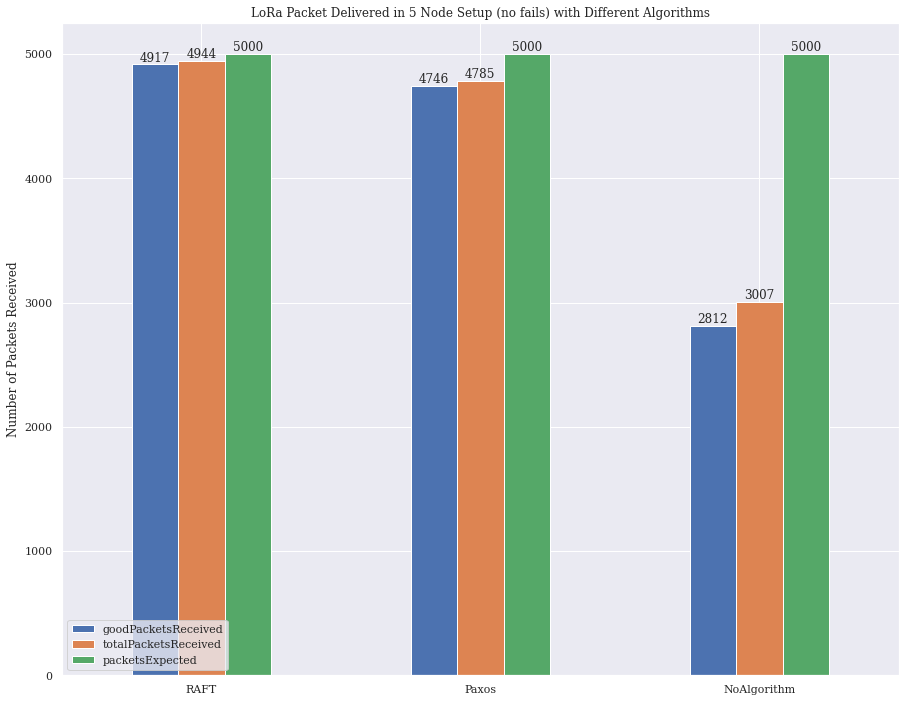

In [84]:
ax = all_5_nodes.plot.bar(x='algorithm')
plt.title('LoRa Packet Delivered in 5 Node Setup (no fails) with Different Algorithms')
ax.set(xlabel='', ylabel='Number of Packets Received')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc='lower left')
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\5_nodes.png', bbox_inches='tight')

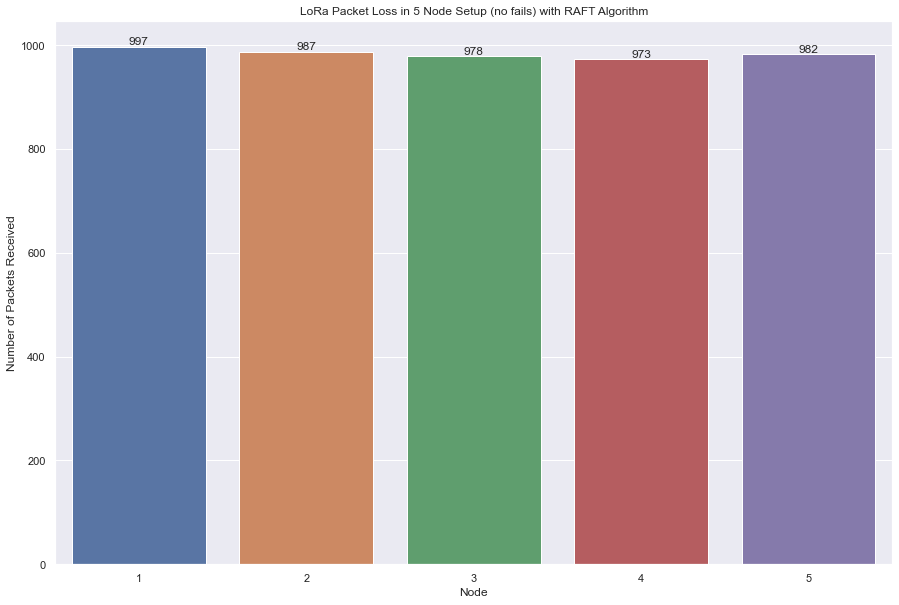

In [85]:
#LoRa Packet Loss in 5 Node Setup (no fails) with RAFT Algorithm
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_raft_5)
plt.title('LoRa Packet Loss in 5 Node Setup (no fails) with RAFT Algorithm')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\5_nodes_RAFT.png', bbox_inches='tight')

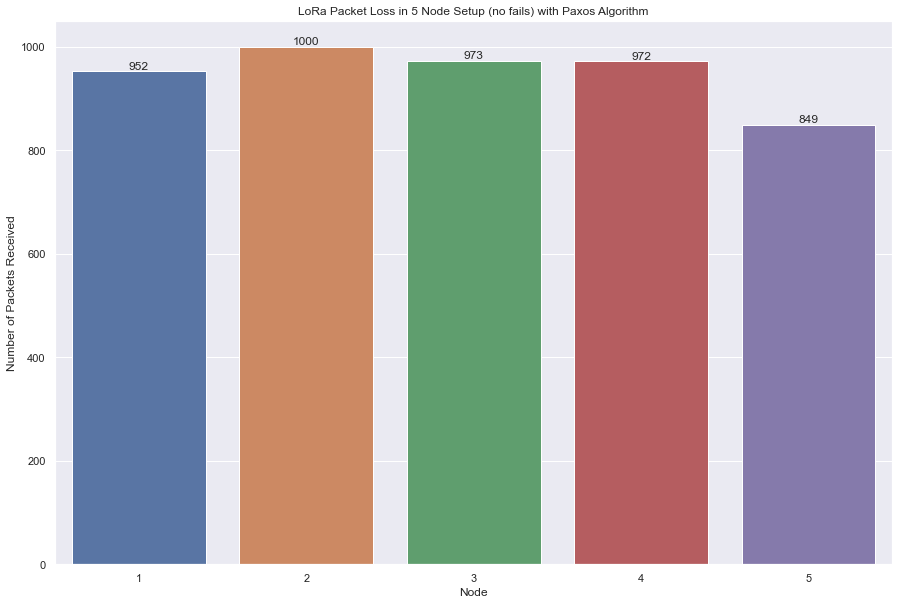

In [86]:
#LoRa Packet Loss in 5 Node Setup (no fails) with Paxos Algorithm
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_paxos_5)
plt.title('LoRa Packet Loss in 5 Node Setup (no fails) with Paxos Algorithm')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\5_nodes_Paxos.png', bbox_inches='tight')

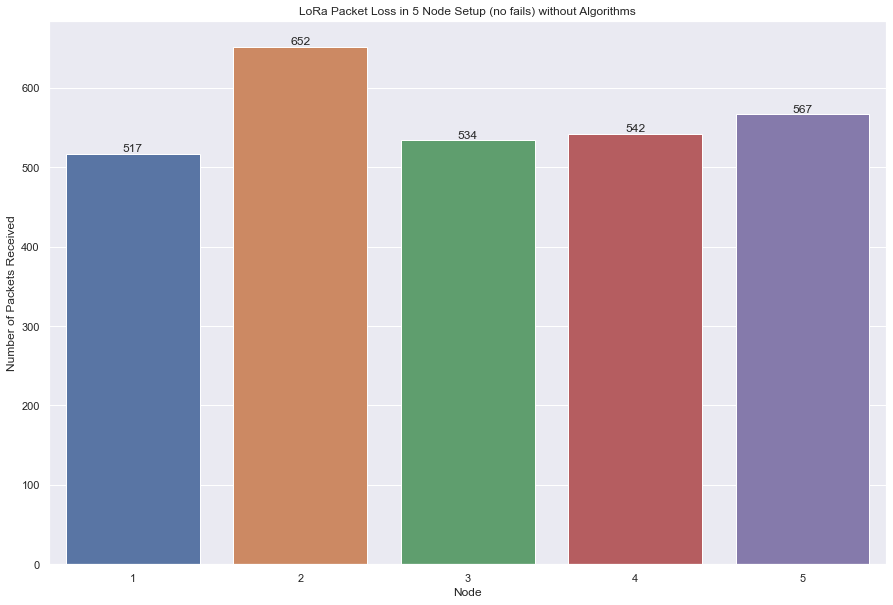

In [87]:
#LoRa Packet Loss in 5 Node Setup (no fails) without Algorithms
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_noalg_5)
plt.title('LoRa Packet Loss in 5 Node Setup (no fails) without Algorithms')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\5_nodes_noAlg_outdoor.png', bbox_inches='tight')

In [62]:
#no alg indoor

In [63]:
indoor_noalg_data_5_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\control\\7_control_5-nodes\\data.csv", error_bad_lines=False, sep=",")

In [64]:
indoor_noalg_data_5_nodes[indoor_noalg_data_5_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2,25,23,41,24
...,...,...,...,...,...,...
2376,6,995,21,158,37,26
2377,6,996,21,128,37,26
2378,6,997,21,168,37,26
2379,6,998,21,144,37,26


In [65]:
indoor_noalg_data_5_nodes_clean = indoor_noalg_data_5_nodes.dropna()

In [66]:
indoor_noalg_data_5_nodes_clean.shape

(2173, 6)

In [67]:
indoor_noalg_data_5_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\indoor_noalg_data_5_nodes_clean.csv', index = False, header=True)

In [68]:
#manual cleaning of the csv req

In [69]:
clean_indoor_noalg_data_5_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\indoor_noalg_data_5_nodes_clean.csv", sep=",")

In [70]:
clean_indoor_noalg_data_5_nodes.shape

(2173, 6)

In [71]:
clean_indoor_noalg_data_5 = clean_indoor_noalg_data_5_nodes.dropna()

In [72]:
clean_indoor_noalg_data_5.shape

(2147, 6)

In [74]:
final_indoor_clean_noalg_5 = clean_indoor_noalg_data_5.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [80]:
df1 = {'algorithm': ['RAFT', 'Paxos', 'NoAlgorithmOutdoor', 'NoAlgorithmIndoor'], 
               'goodPacketsReceived': [len(final_clean_raft_5), len(final_clean_paxos_5), len(final_clean_noalg_5),len(final_indoor_clean_noalg_5)], 
               'totalPacketsReceived': [len(raft_data_5_nodes), len(paxos_data_5_nodes), len(noalg_data_5_nodes),len(indoor_noalg_data_5_nodes)], 
               'packetsExpected': [5000, 5000, 5000,5000]}

all_5_nodes_indoor = pd.DataFrame(df1)

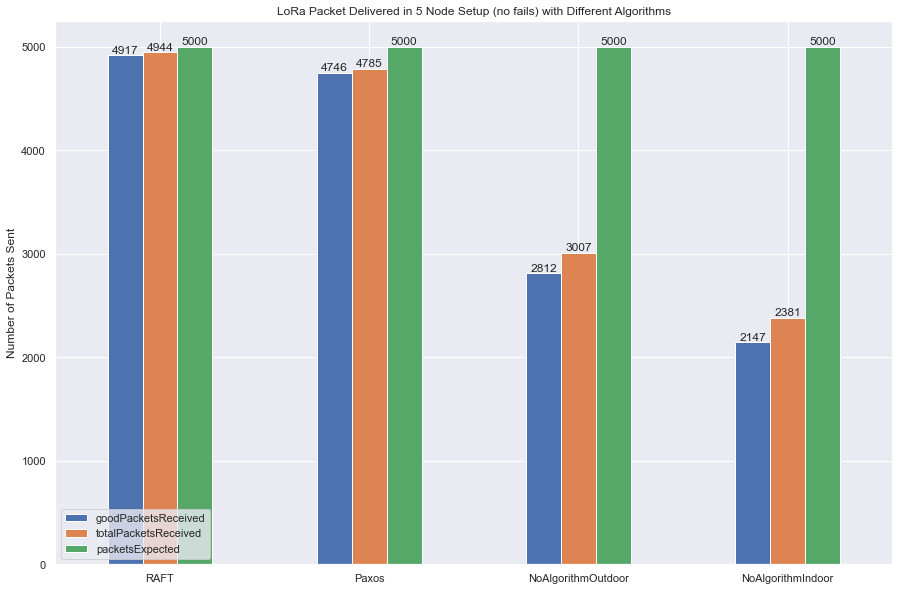

In [88]:
ax = all_5_nodes_indoor.plot.bar(x='algorithm')
plt.title('LoRa Packet Delivered in 5 Node Setup (no fails) with Different Algorithms')
ax.set(xlabel='', ylabel='Number of Packets Sent')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc='lower left')
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\5_nodes_indoor.png', bbox_inches='tight')

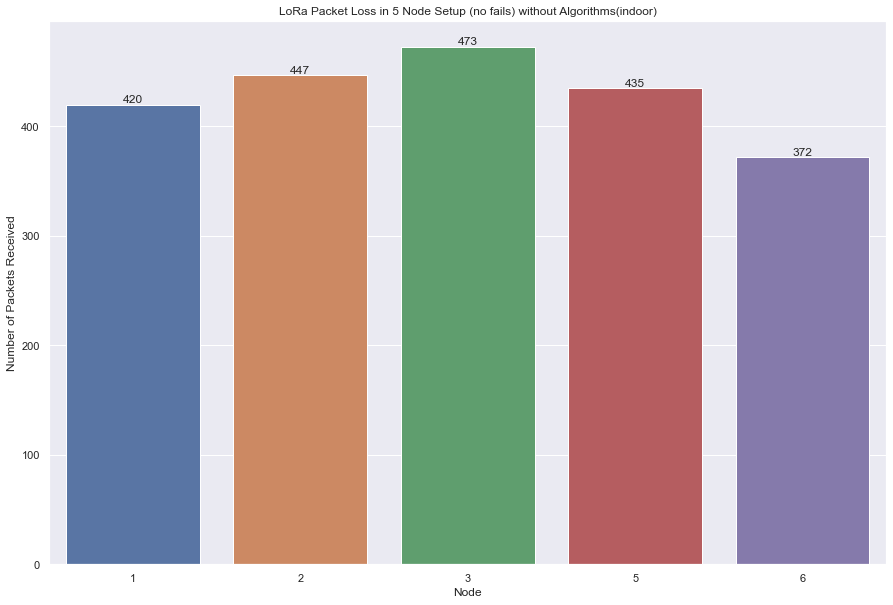

In [89]:
#LoRa Packet Loss in 5 Node Setup (no fails) without Algorithms INDOOR
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_indoor_clean_noalg_5)
plt.title('LoRa Packet Loss in 5 Node Setup (no fails) without Algorithms(indoor)')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\5_nodes_noAlg_indoor.png', bbox_inches='tight')